# In his Great name

#### Artificial Intelligence - Regressions
<hr/>


## Team Members
| Name (Alphabetically ordered)| StdNo |
| ----------- | ----------- |
| Sam Asadi | 9532287 |
| Hossein Dehghanipour | 9532250 |
| Bahare Moradi | 9532245 |

> Shiraz University - Spring 2020



# Report No. 3
### Logistic Regression
<hr/>

> Written By : **Hossein Dehghanipour-9532250**

# Main purpose of Q3
The main purpose of question 3 was to have the students get familiar with the basis of logistic regression and it's applications beside the benefit of learning the methods of implementation.

As the question ___had not mentioned___ neither limited us in the usage of methods of _theta_ calculation, I personally prefered to use the _gradient_ as the core of _theta computation_ and I'll discuss the details with you in a few later lines.

## Libraries
The first and most important part of a code is using the available libraries and code snippets as wisely as possible. We'd better only import the libraries that we need or we may face some performance issues.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ExtraLibraries.Writer import Writer as Writer


## Dynamic Handling
In order to be able to maintain and edit the code as easily as possible, we'd better to put all of our crucial variable( which we may change a lot during the process of coding ) in a class which is accessible by all modules and elements outside the "main" moudule.

In [2]:
class CommandCenter :
    TEST_SIZE = 0.2
    TRAIN_SIZE = 1 - TEST_SIZE
    BOUNDARY_PROBABILTY = 0.5
    PLOT_SCALER = 0.5


class DataCenter :
    X_train = None
    Y_train = None
    X_test  = None
    Y_test = None
    Thetas = None
    FILE_NAME = "iris.csv"
    X = None
    Y = None
    

## Basic Functions
The somplication of A.I and Logistic Regression will be gone if we try to code each and every part of the program functionally as the golden rule of programming says 
>Divide and Conquer, Then solve the problem piece by piece.

Here you will see some basic and important functions that are being used a lot during the program and process of bulidng a logistic regression model.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def hypothesis(X, Thetas):
    z = np.dot(X, Thetas)
    d = sigmoid(z)
    return d


def costFunction(X, Y, Thetas):
    m = len(Y)
    h = hypothesis(X, Thetas)
    cost = Y * np.log(h) + (1 - Y) * np.log(1 - h)
    return cost.sum() / m


## Theta Update
The main goal of our problem is to reach the best curve that would fit both our test set and train set. In order to gain such a goal , we must calculate the __derivation__ of our __Cost Function__ and then find the _most optimal_ thetas possible. If we calculate the equation and set it equal to zero, by solving tthe equation, we would reach such a formula ( _which is vectorized_ ) and the rest of the process would be a piece of cake.

In [4]:
def updateThetas(X, Y, Thetas, alpha ):
    m = len(X)
    h = hypothesis(X, Thetas)
    gradient = (np.dot(X.T, h - Y) / m) * alpha
    Thetas = Thetas - gradient
    return Thetas



The formula above can be gained by solving the equation which is caused by derivation of the cost function. The description of the solution could be found on _Youtube_ or obtained by the descriptions mentioned by ___Dr.Andrew NG - MIT University___. The description of how we have reached this formula is ___Up To You___. Feel free to search and use __Google_.

## Core
The most important part of a machine is training it. Fortunately, this part of our problem is not a big deal here due to the simplicity of the problem and not the essence of having a ___Multi Layered Nueral Network___. So the trainig part will be summarized in a few lines of code. But remeber, in order to gain a __higher accuracy__ we would iterate over the training process for multiple times. ( maybe 10 or 100 of thousands of time).

In [5]:
def train(X, Y, Thetas, alpha, iters):
    costLog = []

    for i in range(iters):
        Thetas = updateThetas(X, Y, Thetas, alpha)
        cost = costFunction(X, Y, Thetas)
        costLog.append(cost)

    return Thetas, costLog



## Accuracy
One the demands of the question was to calculate the accuracy of the algorithm and report it to the user. In the few lines of the code below, you can see that the accuracy has been calculated and logged in a varibale called `accuracy` which will be shown to the user later on.

In [6]:


def calculate_accuracy():
    
    h = hypothesis(DataCenter.X_test,DataCenter.Thetas)
    def decisionBoundry(h):
        h1 = []
        for i in h:
            if ( i >= CommandCenter.BOUNDARY_PROBABILTY).any():
                h1.append(1)
            else:
                h1.append(0)
        return h1
    y_pred = decisionBoundry(h)
    accuracy = 0
    for i in range(0, len(y_pred)):
        if (y_pred[i] == DataCenter.Y_test[i]).any():
            accuracy += 1
    return (accuracy/len(DataCenter.Y_test)* 100) 



## Data Processing
I would vogorously say that the most important part of an AI problem or data science algorithm, is the _Data Processing_ part.
In order to gain the best results, we must ignore the corrupted data or _reform_ them is possible. Fortunately the presented data set was _Nan_ free and did not have any missing data. So my approach would be easier and less complicated than working with most of other data sets. 

In [7]:
def ReadData(fileName):
    dataSet = pd.read_csv(fileName)
    dataSet = dataSet[dataSet.Result != "Iris-versicolor"]
    #dataSet = dataSet[dataSet.Result != "Iris-virginica"]
    dataSet["Result"] = dataSet["Result"].apply(lambda x : 1 if x == "Iris-setosa" else 0 )
    
    # Create X (all the feature columns)
    X = dataSet.drop("Result", axis=1)
    DataCenter.X = X

    # Create y (the target column)
    Y = dataSet["Result"]
    DataCenter.Y = Y

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=CommandCenter.TEST_SIZE)
    
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    # Add Bias to our Features Matrix
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    
    
    '''
     Here, our X is a two-dimensional array and y is a one-dimensional array. 
     Let’s make the ‘y’ two-dimensional to match the dimensions.
    '''
    Y_train = Y_train[:, np.newaxis]
    Y_test = Y_test[:, np.newaxis]
    
    
    return X_train , Y_train , X_test , Y_test


## Plotter
In order to customize the calculated data , I would write a plotter class of my own. This piece of code shown blow doesn't require any technical explanations and only demands your _patience_ and _familiarity_ with the syntax of Python which I'm sure you have.

In [10]:
class Plotter :

    def saveFig(plotPointer , figName , figNumbPath ):
        filerIO = Writer(figNumbPath)
        lines = filerIO.readFile()
        if ( len(lines) == 0 ):
            filerIO.append(1) 
            lines[0] = 1 
        plotPointer.savefig( str(figName) + str(lines[0]) + '.png')
        filerIO.clearFile()
        filerIO.append(str(int(lines[0]) + 1) )   
        print("Figure saved in : " + str(figName))
      
    def plotter(plotInf, X0set , X1set , ResultSet , path ):
        scaler = CommandCenter.PLOT_SCALER
        X0 = ( X0set )
        weights = DataCenter.Thetas
        X1 = ( X1set )

        class_A = []
        class_B = []

        for i in range(len( ResultSet)) :
            if(ResultSet[i] == 0) :
                class_A.append(i)
            else :
                class_B.append(i)
        
        # getting the x co-ordinates of the decision boundary
        x_cords = np.array([min(X0) - scaler, max(X0) + scaler])
        y_cords = (weights[1] * x_cords + weights[0]) * (-1 / weights[2])
        # plot class A data with red color
        plt.scatter([X0[i] for i in class_A], [X1[i] for i in class_A], color='blue',  label='Iris-virginica')
        # plot class B data with red color
        plt.scatter([X0[i] for i in class_B], [X1[i] for i in class_B], color='red', label='Iris-setosa')
        
        # plot class B data with red color
        plt.plot(x_cords, y_cords, color = 'purple', label="Boundary")
        plt.legend()
        
 

        plt.xlabel('X0 - axis') 
        plt.ylabel('X1 - axis') 
        plt.title(" Logistic Regression : " + str(plotInf))  

        plt.legend()         
        Plotter.saveFig(plt , path + "/logistic" , "Plots/figureNumber.txt" )
        plt.show()
    # creates a new folder for each drawn plot.
    def createNewDirectory(foldNumbPath):
        import os
        filerIO = Writer(foldNumbPath)
        lines = filerIO.readFile()
        if ( len(lines) == 0 ):
            filerIO.append(1)        
            lines[0] = 1
        os.mkdir( "Plots/Iteration-" +str(lines[0] ))   
        path = "Plots/Iteration-" + str(lines[0]) 
        filerIO.clearFile()
        filerIO.append(str(int(lines[0]) + 1) ) 
        return path

## Main
The `main` part of the code, is runnig the functions and showing the results to the user. These actions are being done in the snippet code below.

In [11]:
def showInfo(X_train,X_test, accuracy ,history):
    
    trainingSetLenght = len(X_train)/(len(X_train) + len(X_test)) * 100
    testSetLenght = len(X_test)/(len(X_train) + len(X_test)) * 100
    print("Training Set Length : %d Percent " %  trainingSetLenght)
    print("Test Set  Length : %d percent" % testSetLenght )
    print("Test Set  Accuracy : %d percent" %accuracy)
    for i in range(len(history)):
        if(i % 10000 == 0 ):
            print("Error : %f | ItNo : %d" %(history[i],i))

    #S = "Training Set Length :" + str(trainingSetLenght) + " Percent \n" + "Test Set  Length : "+ str(testSetLenght)+" Percent \n"  + "Test Set  Accuracy :"+str(accuracy)+" percent \n" 
    S = "TestSet : Accuracy :"+str(accuracy) + "%"
    print("============================")
    print("{0} + ({1})X1 + ({2})X2 = 0 " .format(DataCenter.Thetas[0],DataCenter.Thetas[1],DataCenter.Thetas[2]))
    print("Or in another words : ")
    print("X2 = [ X1 * ( {0} )  + ({1}) ]/({2})".format(DataCenter.Thetas[1],DataCenter.Thetas[0],DataCenter.Thetas[2]*(-1)) ) 
    print("============================")
    return S
        
def main() :
    print("Processing ... Please Wait.")
    DataCenter.X_train , DataCenter.Y_train , DataCenter.X_test , DataCenter.Y_test = ReadData(DataCenter.FILE_NAME)
    #initialize the Theta Matrix
    initialThetas = np.zeros((3,1))
    # Train the model
    DataCenter.Thetas, history = train(DataCenter.X_train, DataCenter.Y_train, initialThetas, 0.1, 100000)
    # plot the model
    plotInf = showInfo(DataCenter.X_train,DataCenter.X_test, calculate_accuracy(),history )
    path  = Plotter.createNewDirectory("Plots/folderNumber.txt")
    Plotter.plotter("TrainSet" , DataCenter.X_train[:,1] , DataCenter.X_train[:,2] , DataCenter.Y_train ,path )
    Plotter.plotter(plotInf , DataCenter.X_test[:,1] , DataCenter.X_test[:,2] , DataCenter.Y_test ,path)
    

## Run

Processing ... Please Wait.
Training Set Length : 80 Percent 
Test Set  Length : 20 percent
Test Set  Accuracy : 95 percent
Error : -0.682713 | ItNo : 0
Error : -0.012222 | ItNo : 10000
Error : -0.007222 | ItNo : 20000
Error : -0.005236 | ItNo : 30000
Error : -0.004142 | ItNo : 40000
Error : -0.003441 | ItNo : 50000
Error : -0.002950 | ItNo : 60000
Error : -0.002587 | ItNo : 70000
Error : -0.002306 | ItNo : 80000
Error : -0.002082 | ItNo : 90000
[4.90640479] + ([-10.287339])X1 + ([16.39270293])X2 = 0 
Or in another words : 
X2 = [ X1 * ( [-10.287339] )  + ([4.90640479]) ]/([-16.39270293])
Handle Binded With Existing File Named : Plots/folderNumber.txt
Handle Binded With Existing File Named : Plots/figureNumber.txt
Figure saved in : Plots/Iteration-23/logistic


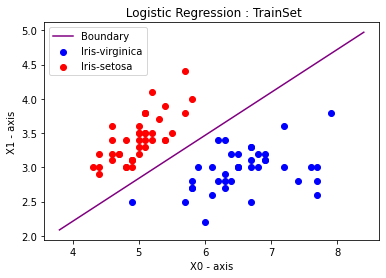

Handle Binded With Existing File Named : Plots/figureNumber.txt
Figure saved in : Plots/Iteration-23/logistic


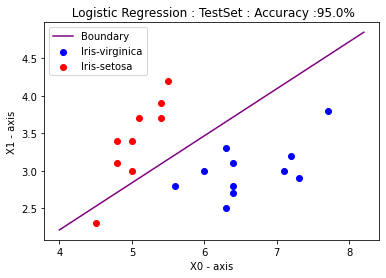

In [12]:
main()   

<hr/>

### This Document is written in Jupyter Notebook
### With Regards, Hossein Dehghanipour
### Spring 2020